In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
gdf = gpd.read_file('C://Users/dadel/Downloads/global_mining_polygons_v2.gpkg')

In [3]:
gdf

,ISO3_CODE,COUNTRY_NAME,AREA,geometry
0,GBR,United Kingdom,1.782044,"POLYGON ((-1.6713 55.0766, -1.6704 55.0771, -1..."
1,FJI,Fiji,0.023405,"POLYGON ((177.8548 -17.5173, 177.8549 -17.5181..."
2,NZL,New Zealand,0.042758,"POLYGON ((175.872 -37.3449, 175.8718 -37.345, ..."
3,FJI,Fiji,0.248552,"POLYGON ((177.8426 -17.5185, 177.8437 -17.5203..."
4,FJI,Fiji,0.132724,"POLYGON ((177.8495 -17.4951, 177.8492 -17.4957..."
...,...,...,...,...
44924,MMR,Myanmar/Burma,59.142766,"POLYGON ((95.34897 24.87628, 95.34712 24.87702..."
44925,MMR,Myanmar/Burma,22.594663,"POLYGON ((95.1815 23.06169, 95.18657 23.06208,..."
44926,MMR,Myanmar/Burma,50.378050,"POLYGON ((95.08308 23.00777, 95.08286 22.99513..."
44927,MMR,Myanmar/Burma,319.048480,"POLYGON ((95.13799 24.7183, 95.12868 24.71187,..."


In [4]:
# Load the world borders dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the polygons with country borders overlay
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons from your GeoPackage
gdf.plot(ax=ax, edgecolor='blue', facecolor='lightblue', linewidth=2.8)  # Plot polygons

# Overlay the country borders from the 'world' dataset
world.boundary.plot(ax=ax, linewidth=1, color='red')  # Adjust color and linewidth as needed

# Customize the plot
plt.title('Polygons with Country Borders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Set custom limits to zoom into a specific region
plt.xlim(30, 90)
plt.ylim(30, 80)

# Show the plot
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [ ]:
### Hotspots

In [5]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [6]:
gdf['centroid'] = gdf.centroid

# Extract the latitude and longitude pairs from the centroids
coords = [(point.y, point.x) for point in gdf['centroid']]

# Initialize a map centered around the data (mean of coordinates)
m = folium.Map(location=[gdf['centroid'].y.mean(), gdf['centroid'].x.mean()], zoom_start=6)

# Add heatmap to the map
HeatMap(coords, radius=15, blur=25, max_zoom=1).add_to(m)

# Save the map to an HTML file or display it directly in a Jupyter notebook
m.save("interactive_heatmap.html")
m

C:\Users\dadel\AppData\Local\Temp\ipykernel_20908\3723319892.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


In [ ]:
#### Let's come up with an equivalent for translation

In [7]:
gdf

,ISO3_CODE,COUNTRY_NAME,AREA,geometry,centroid
0,GBR,United Kingdom,1.782044,"POLYGON ((-1.6713 55.0766, -1.6704 55.0771, -1...",POINT (-1.66806 55.07616)
1,FJI,Fiji,0.023405,"POLYGON ((177.8548 -17.5173, 177.8549 -17.5181...",POINT (177.85569 -17.51778)
2,NZL,New Zealand,0.042758,"POLYGON ((175.872 -37.3449, 175.8718 -37.345, ...",POINT (175.87225 -37.34616)
3,FJI,Fiji,0.248552,"POLYGON ((177.8426 -17.5185, 177.8437 -17.5203...",POINT (177.84573 -17.51817)
4,FJI,Fiji,0.132724,"POLYGON ((177.8495 -17.4951, 177.8492 -17.4957...",POINT (177.85103 -17.49514)
...,...,...,...,...,...
44924,MMR,Myanmar/Burma,59.142766,"POLYGON ((95.34897 24.87628, 95.34712 24.87702...",POINT (95.40187 24.86241)
44925,MMR,Myanmar/Burma,22.594663,"POLYGON ((95.1815 23.06169, 95.18657 23.06208,...",POINT (95.19444 23.08189)
44926,MMR,Myanmar/Burma,50.378050,"POLYGON ((95.08308 23.00777, 95.08286 22.99513...",POINT (95.11077 22.97481)
44927,MMR,Myanmar/Burma,319.048480,"POLYGON ((95.13799 24.7183, 95.12868 24.71187,...",POINT (95.19578 24.69057)


In [8]:
from gadm import GADMDownloader
from matplotlib import colors
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def aggregate_production_by_region(data_agr, 
                                   countries, 
                                   admin_level=2,
                                  ):
    #Filter data based on specified countries
    filtered_data = data_agr[data_agr['COUNTRY_NAME'].isin(countries)]

    # Initialize downloader and storage for country geodata
    downloader = GADMDownloader(version="4.0")
    country_gdfs = []

    # Download and aggregate geometries for each country
    for country_name in countries:
        try:
            # Attempt to download at specified admin level (default to level 2)
            gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=admin_level)
            gdf["ID"] = gdf["ID_2"]
        except Exception as e:
            print(f"Level {admin_level} data not available for {country_name}, trying lower level")
            try:
                # If higher admin level fails, try level 1
                gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=1)
                gdf["ID"] = gdf["ID_1"]  # Set HASC_2 to 1 for countries with no admin level 2
            except Exception as e:
                print(f"Could not download data for {country_name} at level 1: {e}")
                continue
        country_gdfs.append(gdf)

    #Combine all country GeoDataFrames
    combined_gdf = gpd.GeoDataFrame(pd.concat(country_gdfs, ignore_index=True))

    #Ensure CRS
    combined_gdf.set_crs(epsg=4326, inplace=True, allow_override=True)
    combined_gdf["keep_pol"] = combined_gdf["geometry"]
    
    filtered_data["x"] = filtered_data["centroid"].x
    filtered_data["y"] = filtered_data["centroid"].y
    

    #Prepare GeoDataFrame
    geometry = [Point(xy) for xy in zip(filtered_data['x'], filtered_data['y'])]
    geo_df = gpd.GeoDataFrame(filtered_data, geometry=geometry, crs="EPSG:4326")

    # Spatial join to link production data points to region polygons
    new_dat = gpd.sjoin(geo_df, combined_gdf, how="left", predicate="within")

    # Aggregate production data by region
    aggregated_data = new_dat.groupby(['keep_pol', "ID"]).agg({
        'AREA': 'sum'
    }).reset_index()

    #Merge back with the combined GeoDataFrame to ensure no regions are missing (and keep IDs)
    new_gdf = combined_gdf.merge(aggregated_data, on= ["keep_pol"], how="left")
    
    #new_gdf = gpd.GeoDataFrame(aggregated_data, geometry='keep_pol')

    # Ensure that the new GeoDataFrame has a valid CRS (coordinate reference system)
    # Assuming the original data uses EPSG:4326 (latitude/longitude)
    new_gdf = new_gdf[['keep_pol', 'ID_y', 'AREA']]
    new_gdf = gpd.GeoDataFrame(aggregated_data, geometry='keep_pol')
    new_gdf.set_crs(epsg=4326, allow_override=True)
    
    #Fill NaN production values with 0 for empty regions
    production_cols = ['AREA']
    new_gdf[production_cols] = new_gdf[production_cols].fillna(0)

    #Generate a GeoDataFrame with centroids
    centroid_gdf = new_gdf.copy()
    centroid_gdf["keep_pol"] = centroid_gdf["keep_pol"].centroid

    # Ensure CRS
    new_gdf.set_crs(epsg=4326, allow_override=True)
    centroid_gdf.set_crs(epsg=4326, allow_override=True)
    
    centroid_gdf.to_file("min_prod.geojson", driver="GeoJSON")
    
    return new_gdf


In [10]:
iso_country_codes = ['Georgia', "Turkmenistan", "Turkey", "Tajikistan", 
                     "Azerbaijan", "Kazakhstan", "Uzbekistan", "Armenia", 
                     "Kyrgyzstan"] 

In [11]:
A = aggregate_production_by_region(gdf,
                                     iso_country_codes,
                                     admin_level = 2)

Level 2 data not available for Armenia, trying lower level


C:\Users\dadel\anaconda3\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\dadel\anaconda3\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\dadel\AppData\Local\Temp\ipykernel_20908\786261531.py:69: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometri

In [12]:
A

,keep_pol,ID,AREA
0,"MULTIPOLYGON (((27.53292 37.16458, 27.53347 37...",TUR.59.9_1,37.691111
1,"MULTIPOLYGON (((28.51649 37.49518, 28.54008 37...",TUR.59.8_1,8.621595
2,"MULTIPOLYGON (((29.68426 36.919, 29.71298 36.9...",TUR.8.3_1,2.885307
3,"MULTIPOLYGON (((32.49873 36.57616, 32.48878 36...",TUR.8.2_1,0.865169
4,"MULTIPOLYGON (((30.58931 36.80403, 30.58958 36...",TUR.8.14_1,3.006847
...,...,...,...
278,"MULTIPOLYGON (((71.86432 39.98548, 71.84918 39...",UZB.3.5_1,0.643779
279,"MULTIPOLYGON (((72.54145 39.79211, 72.53322 39...",KGZ.7.6_1,6.719049
280,"MULTIPOLYGON (((73.37868 40.48864, 73.37384 40...",KGZ.7.5_1,0.980355
281,"MULTIPOLYGON (((72.39902 40.40415, 72.39976 40...",KGZ.7.2_1,0.356653


In [ ]:
## Visualize

In [13]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf_world_real = gpd.read_file(url)

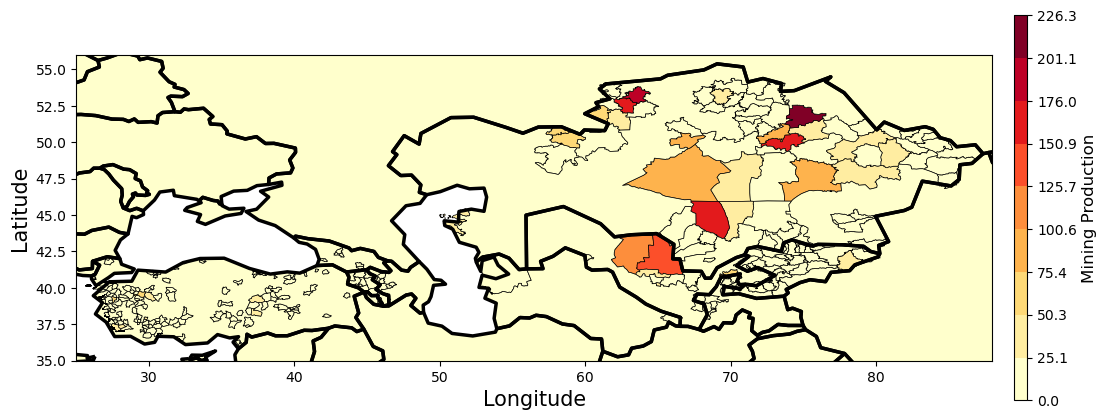

In [14]:
new_gdf = A

if new_gdf.crs != 'EPSG:4326':
    new_gdf = new_gdf.to_crs(epsg=4326)
full_gdf = gpd.overlay(gdf_world_real, new_gdf, how='union', keep_geom_type=False)
full_gdf['sum_agr'] = full_gdf['AREA'].fillna(0)
full_gdf['log_sum_agr'] = full_gdf['sum_agr']
bins = np.linspace(0, full_gdf['log_sum_agr'].max(), 10)
norm = colors.BoundaryNorm(bins, ncolors=256, clip=True)
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size
ax.set_aspect('equal') 

# Plot the world boundaries
gdf_world_real.boundary.plot(ax=ax, linewidth=2.5, color='black')  # Thicker lines for country borders

# Plot the choropleth map on top of the world boundaries
full_gdf.plot(
    ax=ax,                      
    column='log_sum_agr',       
    cmap='YlOrRd',              
    norm=norm,                  
    legend=False,               
    edgecolor='black',          
    linewidth=0.5               
)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm._A = [] 
# Adjust the color bar with a smaller size and position it better
cbar = plt.colorbar(sm, ax=ax, shrink=0.5, aspect=30, pad=0.02)  
cbar.set_label('Mining Production', fontsize=12)

# Set title and labels
ax.set_xlim([25, 88])  # Longitude limits (adjust to your region)
ax.set_ylim([35, 56])  # Latitude limits (adjust to your region)

#plt.title('AGR Production', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

# Step 9: Display the plot with tight layout to avoid any extra white space
plt.tight_layout()
plt.show()
